In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
df=pd.read_csv(r'C:\Users\DELL\Desktop\DATA SCIENCE\Assignment\ML PROJECT\Gold Price (2013-2023).csv')

In [9]:
# Preview the first few rows
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [11]:
#STEP 2: Clean and Preprocess the Data
# Drop unnecessary columns
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

In [15]:
df.head()

,Date,Price,Open,High,Low
2582,2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10"
2581,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30"
2580,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00"
2579,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30"
2578,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80"


In [13]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

Missing values in each column:
Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [19]:
 #Rename 'Price' to 'Close' for consistency with time series convention
df.rename(columns={'Price': 'Close'}, inplace=True)

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Final data structure check
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2013-01-02 to 2022-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2583 non-null   object
 1   Open    2583 non-null   object
 2   High    2583 non-null   object
 3   Low     2583 non-null   object
dtypes: object(4)
memory usage: 100.9+ KB


In [21]:
# Remove commas and convert 'Close' column to float
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(float)

In [23]:
#STEP 3: EDA — Visualizing the Gold Price

# Set visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

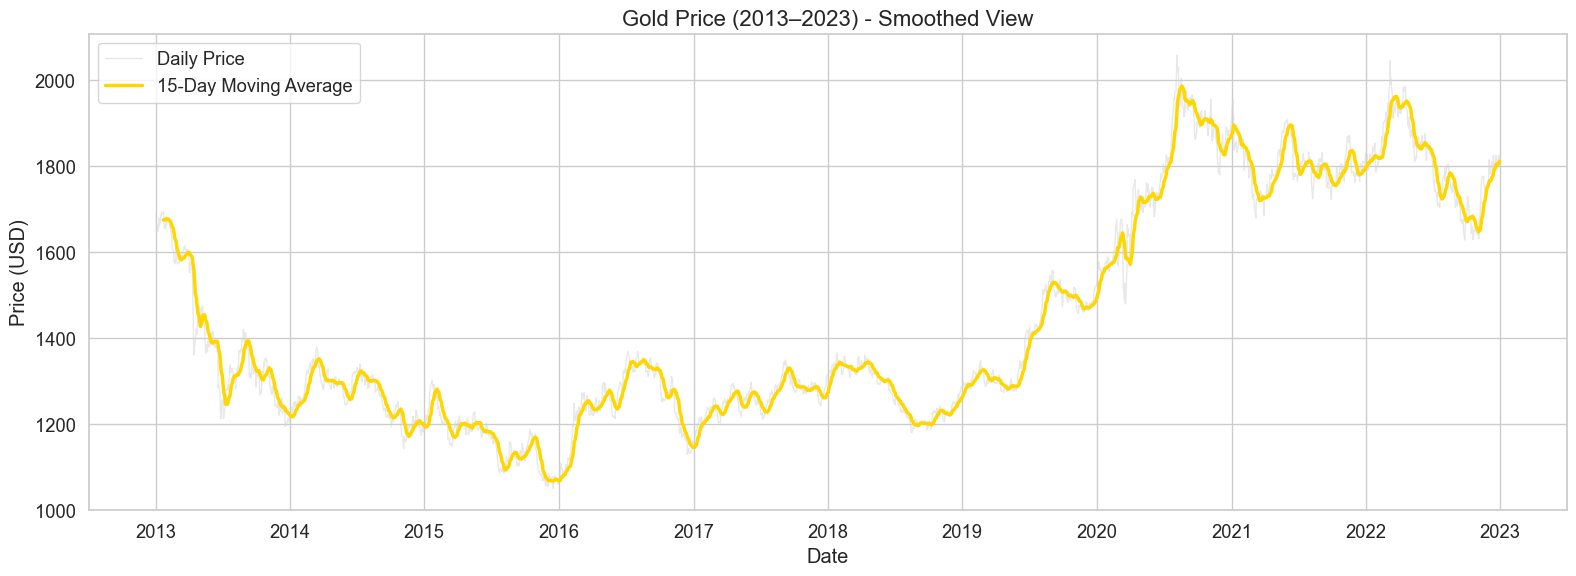

In [25]:
#Line Plot with Moving Average (Smoothed Trend)

# 15-day moving average for smoother trend
df['MA_15'] = df['Close'].rolling(window=15).mean()

plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], color='lightgrey', linewidth=1, label='Daily Price', alpha=0.5)
plt.plot(df.index, df['MA_15'], color='gold', linewidth=2.5, label='15-Day Moving Average')
plt.title('Gold Price (2013–2023) - Smoothed View', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

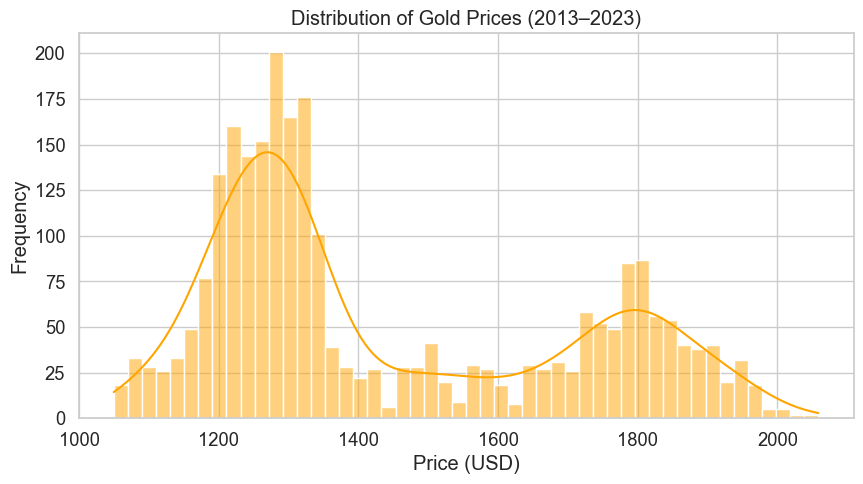

In [27]:
#Distribution of Gold Prices (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='orange')
plt.title('Distribution of Gold Prices (2013–2023)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

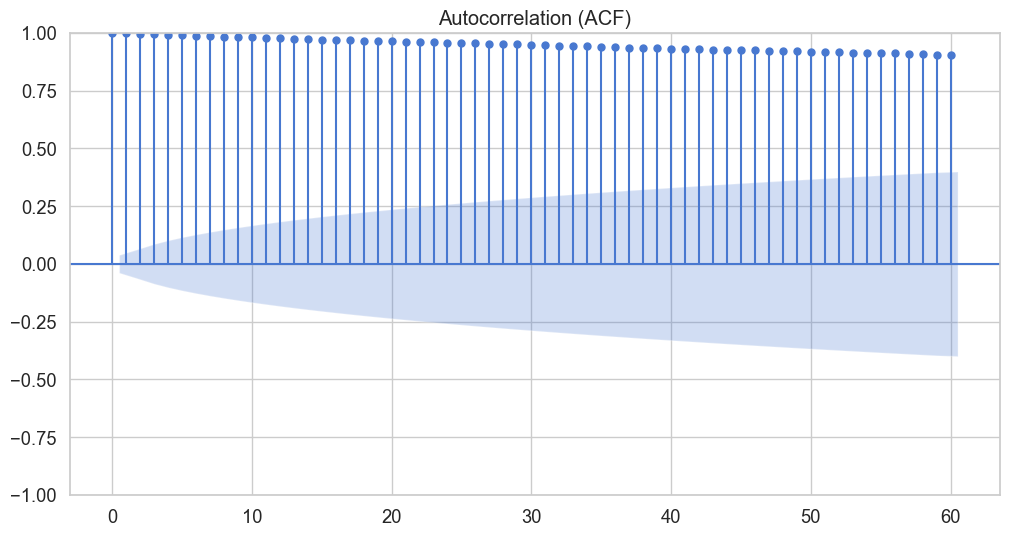

In [29]:
# ACF to understand if today's gold price is related to past prices
plot_acf(df['Close'], lags=60)
plt.title('Autocorrelation (ACF)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10776\281774568.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


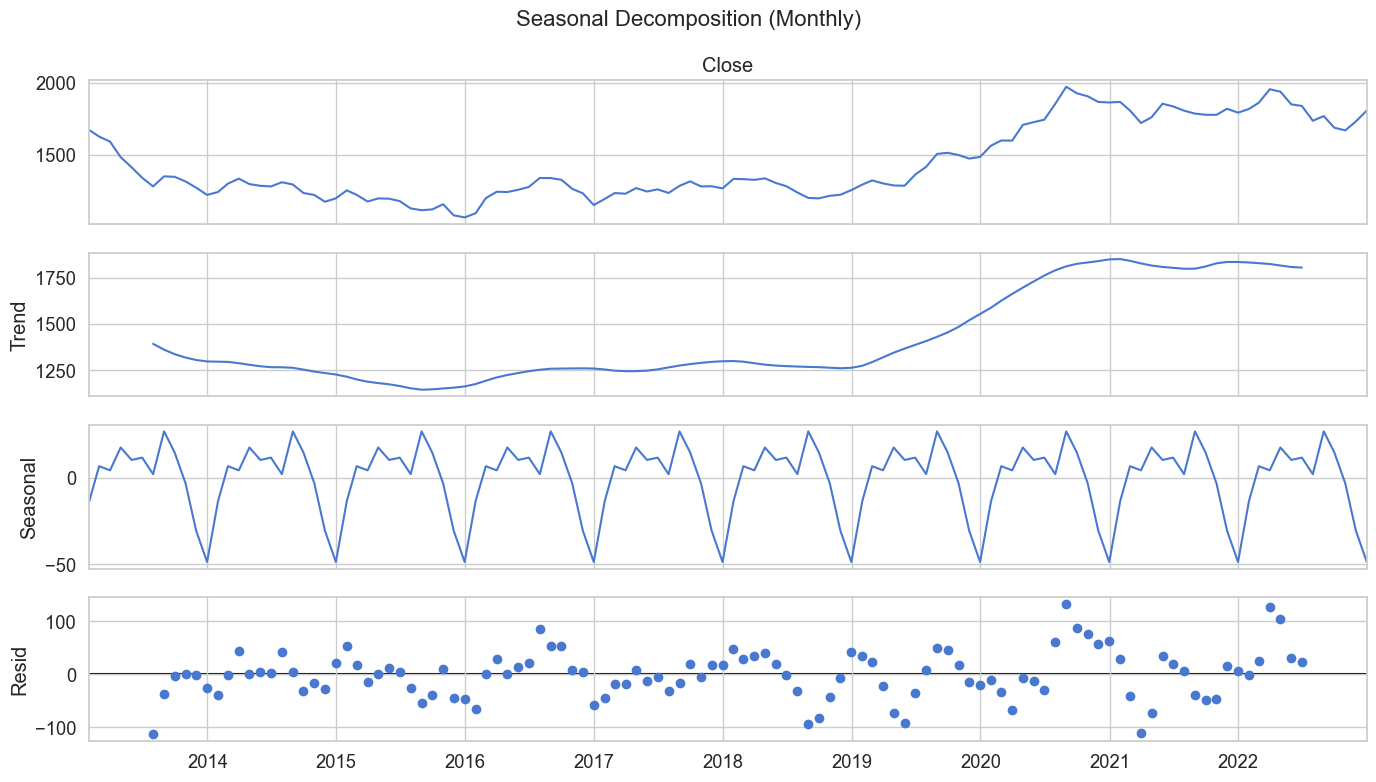

In [31]:
# it's used to break down time series data into components
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_df = df['Close'].resample('M').mean()

decomposition = seasonal_decompose(monthly_df, model='additive')

fig = decomposition.plot()
fig.set_size_inches(14, 8) # make it wider and taller
plt.suptitle('Seasonal Decomposition (Monthly)', fontsize=16)
plt.tight_layout()
plt.show()

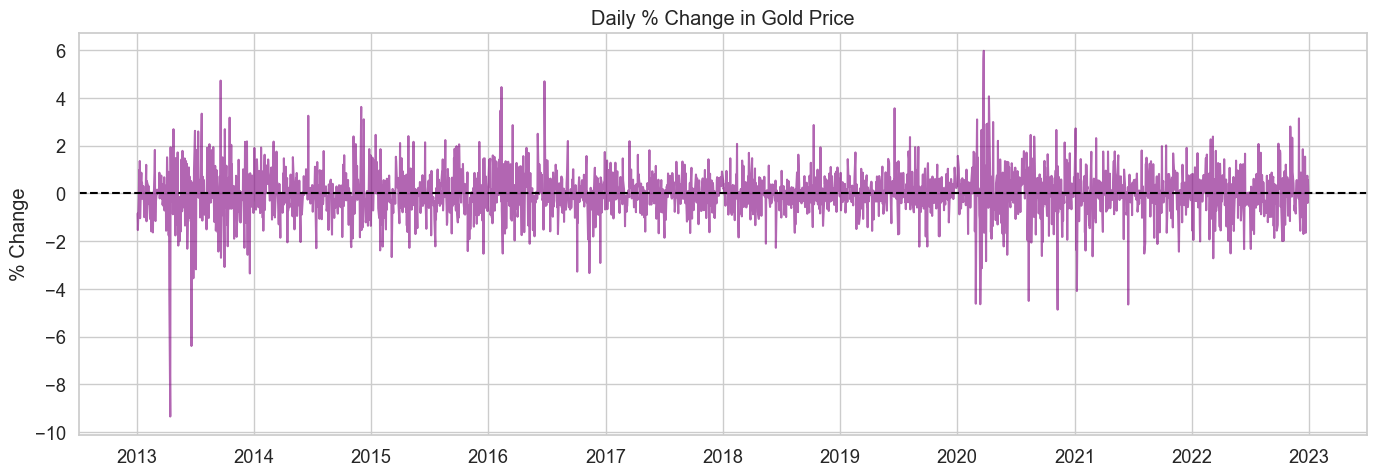

In [33]:
df['Daily_Change'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Daily_Change'], color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Daily % Change in Gold Price')
plt.ylabel('% Change')
plt.tight_layout()
plt.show()

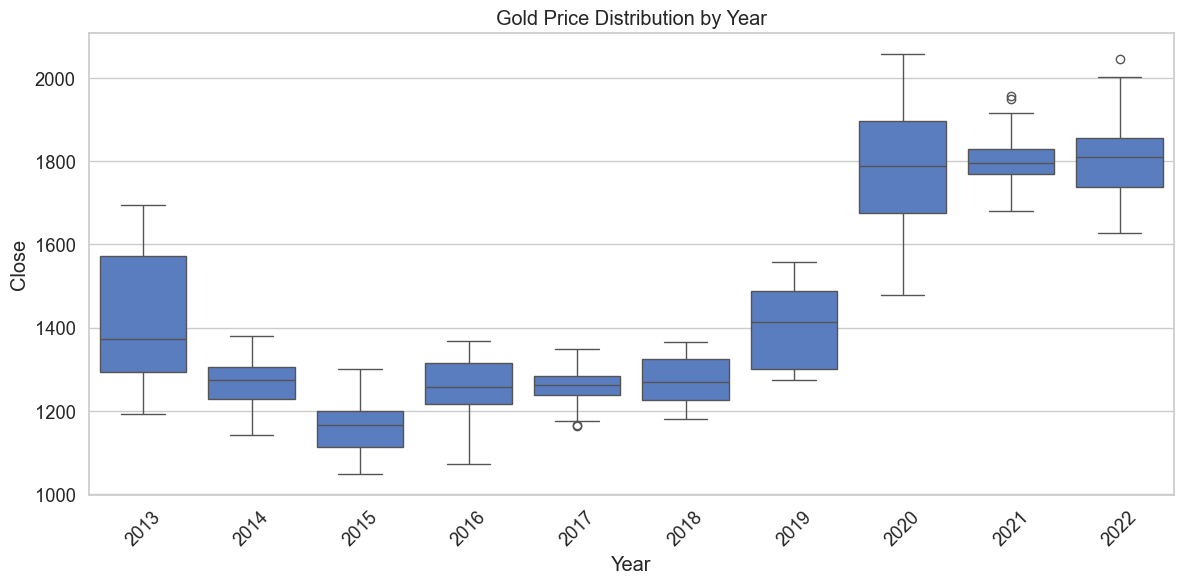

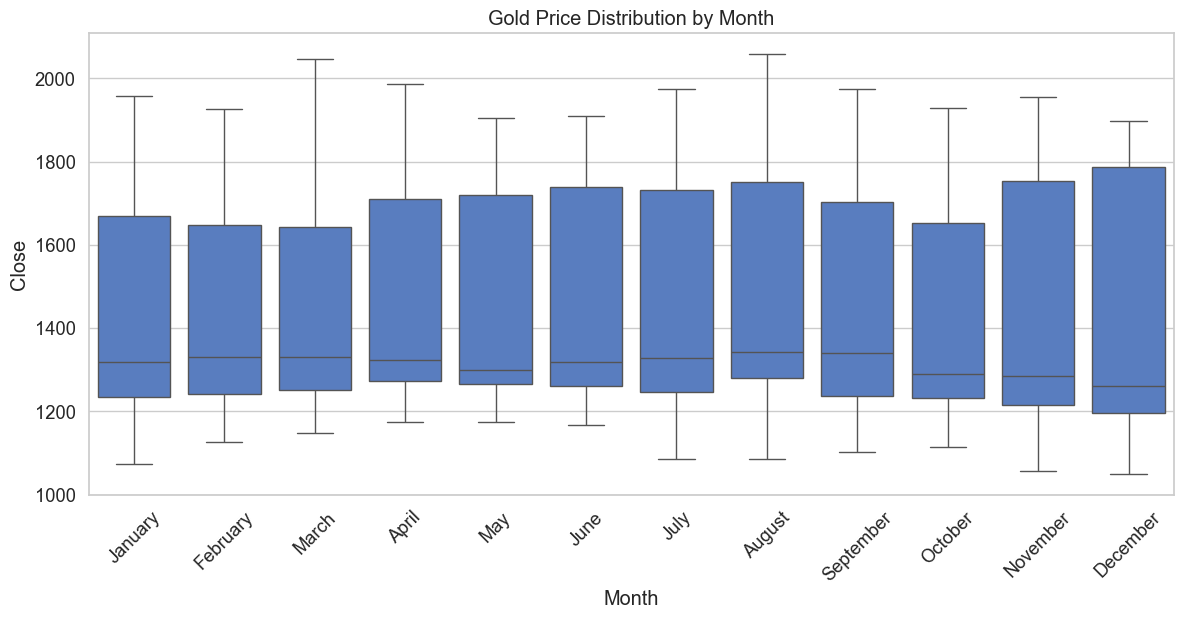

In [35]:
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

# Boxplot by Year
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Gold Price Distribution by Year')
plt.xticks(rotation=45)
plt.show()

# Boxplot by Month (Ordered)
# The boxplot shows the distribution of gold prices across all years for each month
plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='Close', data=df, order=[
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'])
plt.title('Gold Price Distribution by Month')
plt.xticks(rotation=45)
plt.show()

In [37]:
#Data Preparation
window_size = 60
# Use only the 'Close' price
data = df[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Get test size based on all of 2022 data
test_size = df[df.index.year == 2022].shape[0]

# Split chronologically
train_data = scaled_data[:-test_size]
# from len(data) - test_size - window_size and go to the end
test_data = scaled_data[-test_size - window_size:] 

print("Scaled data shape:", scaled_data.shape)
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Scaled data shape: (2583, 1)
Train shape: (2323, 1)
Test shape: (320, 1)


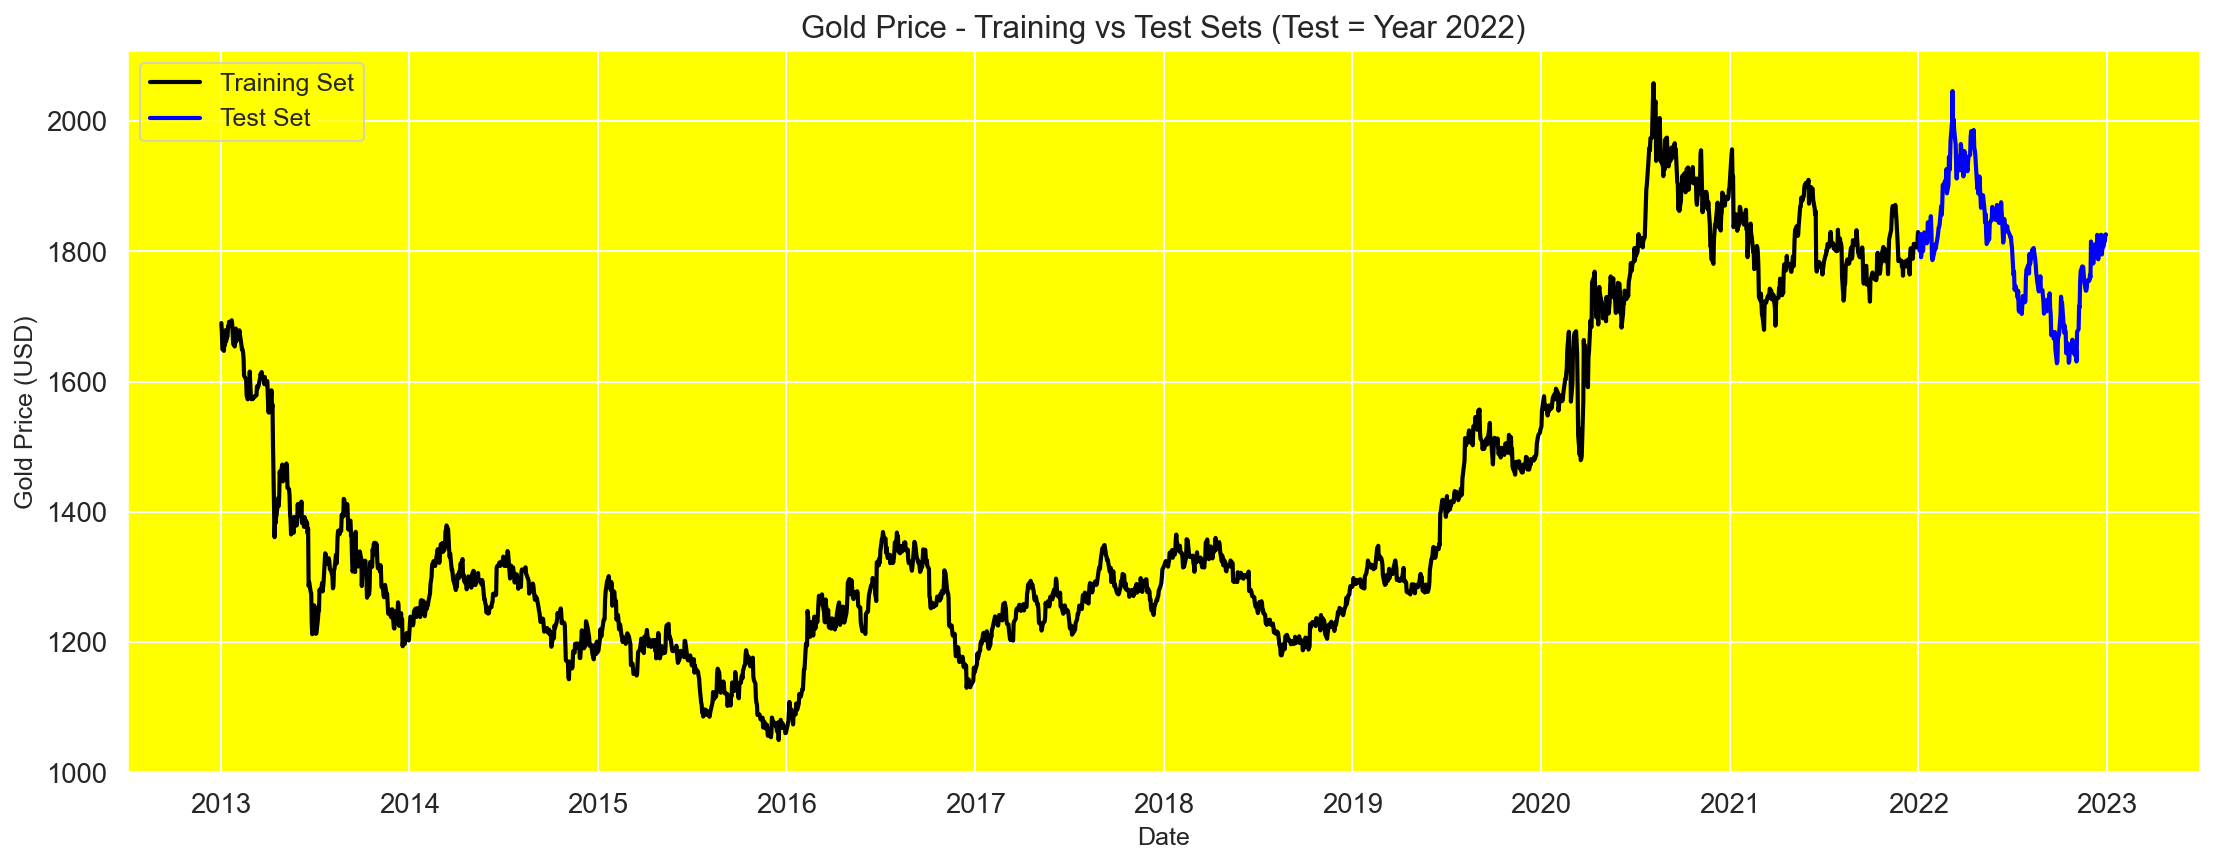

In [39]:
# For plotting, reset index so we have 'Date' column again
df_reset = df.reset_index()

# 🟡 Plot Train vs Test Sets
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

plt.plot(df_reset['Date'][:-test_size], df_reset['Close'][:-test_size], color='black', lw=2)
plt.plot(df_reset['Date'][-test_size:], df_reset['Close'][-test_size:], color='blue', lw=2)

plt.title('Gold Price - Training vs Test Sets (Test = Year 2022)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (USD)', fontsize=12)
plt.legend(['Training Set', 'Test Set'], loc='upper left', prop={'size': 12})
plt.grid(color='white')
plt.tight_layout()
plt.show()

In [41]:
#Prepare Sequences for LSTM
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])  # 60 previous values
        y.append(data[i, 0])                # 61st value (target)
    return np.array(X), np.array(y)


# Set window size
window_size = 60

# Prepare training sequences
X_train, y_train = create_sequences(train_data, window_size)

# Prepare test sequences
X_test, y_test = create_sequences(test_data, window_size)

# Reshape input to 3D for LSTM: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [43]:
#Build and Train the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0107 - val_loss: 0.0017
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.4191e-04 - val_loss: 0.0011
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9831e-04 - val_loss: 0.0010
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 6.7421e-04 - val_loss: 9.4794e-04
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.4162e-04 - val_loss: 8.9632e-04
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.2714e-04 - val_loss: 0.0010
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.9892e-04 - val_loss: 8.1872e-04
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.6720e-04 - val_loss: 7.8817e-04
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.4591e-04 - val_loss: 9.0256e-04
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.3186e-04 - val_loss: 7.0107e-04
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1436e-04 - val_loss: 8.9667

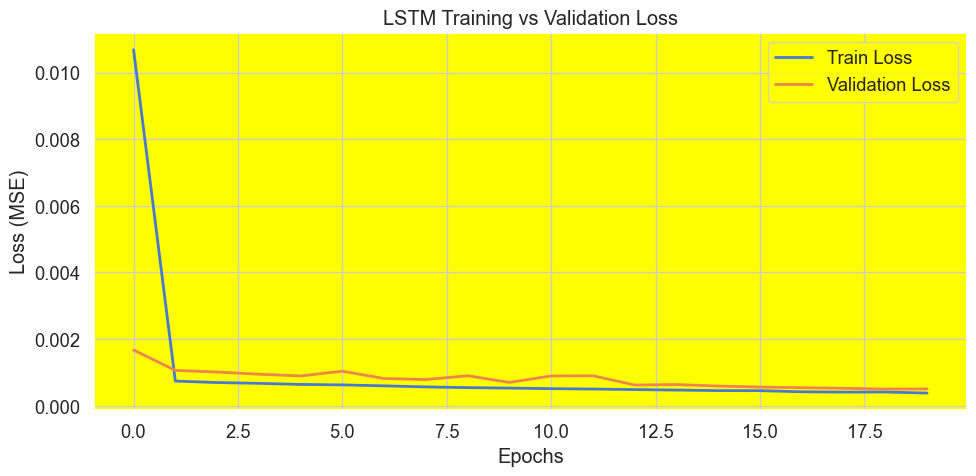

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#Evaluation On Test Set
# Evaluate test loss (MSE)
result = model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0646e-04


In [49]:
from sklearn.metrics import mean_absolute_percentage_error

# Predict
y_pred = model.predict(X_test)

# Calculate MAPE and Accuracy
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test Loss: 0.0005064553115516901
Test MAPE: 0.02341163700263002
Test Accuracy: 0.97658836299737


In [51]:
# Inverse scale the predictions and actuals
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_pred)

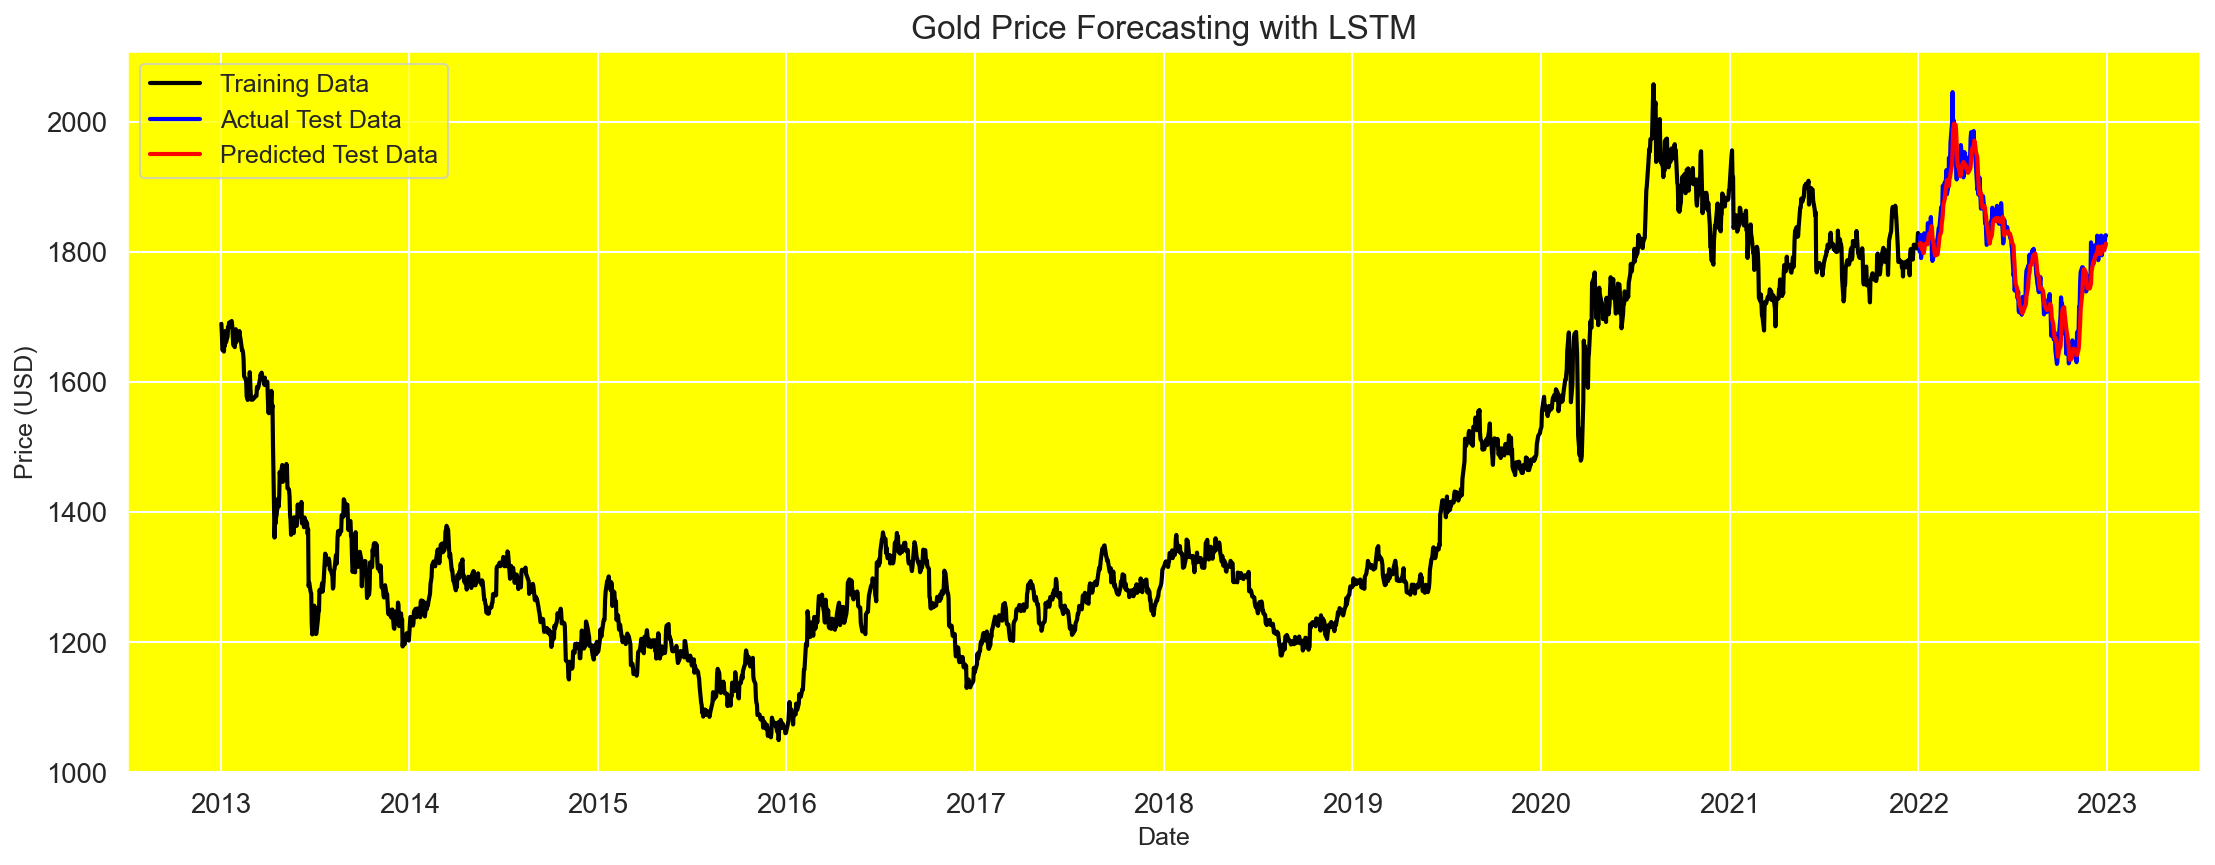

In [53]:
# Adjusted test_dates to match the length of y_test_pred/y_test_true
test_dates = df.index[-test_size - window_size:][-len(y_test_true):]
train_dates = df.index[:len(train_data)]  # matches scaler.inverse_transform(train_data)

# Plotting
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes', edgecolor='white')

plt.plot(train_dates, scaler.inverse_transform(train_data), color='black', lw=2, label='Training Data')
plt.plot(test_dates, y_test_true, color='blue', lw=2, label='Actual Test Data')
plt.plot(test_dates, y_test_pred, color='red', lw=2, label='Predicted Test Data')

plt.title('Gold Price Forecasting with LSTM', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(color='white')
plt.tight_layout()
plt.show()